In [6]:
!nvidia-smi

Sat May 10 05:52:06 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   36C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [7]:
!pip install ultralytics

In [8]:
from ultralytics import YOLO
from IPython.display import Image

In [9]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="8TWgW9pvgyQNA7eAmc0M")
project = rf.workspace("jayz-workspace").project("helmet-detector-9rzmg")
version = project.version(4)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...


In [10]:
dataset.location


'/content/Helmet-Detector-4'

In [11]:
!rm -rf runs

In [12]:
!yolo task=detect mode=train data={dataset.location}/data.yaml model="yolov8s.pt" epochs=50 imgsz=640


Ultralytics 8.3.130 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Helmet-Detector-4/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pr

In [13]:
!zip -r /content/train_results.zip runs/detect/train
from google.colab import files
files.download('/content/train_results.zip')

  adding: runs/detect/train/ (stored 0%)
  adding: runs/detect/train/train_batch0.jpg (deflated 2%)
  adding: runs/detect/train/weights/ (stored 0%)
  adding: runs/detect/train/weights/best.pt (deflated 8%)
  adding: runs/detect/train/weights/last.pt (deflated 8%)
  adding: runs/detect/train/val_batch0_pred.jpg (deflated 6%)
  adding: runs/detect/train/train_batch14161.jpg (deflated 5%)
  adding: runs/detect/train/confusion_matrix.png (deflated 21%)
  adding: runs/detect/train/R_curve.png (deflated 7%)
  adding: runs/detect/train/results.png (deflated 8%)
  adding: runs/detect/train/val_batch0_labels.jpg (deflated 6%)
  adding: runs/detect/train/results.csv (deflated 63%)
  adding: runs/detect/train/train_batch1.jpg (deflated 2%)
  adding: runs/detect/train/val_batch2_pred.jpg (deflated 5%)
  adding: runs/detect/train/labels.jpg (deflated 34%)
  adding: runs/detect/train/args.yaml (deflated 52%)
  adding: runs/detect/train/train_batch2.jpg (deflated 2%)
  adding: runs/detect/train/PR_c

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

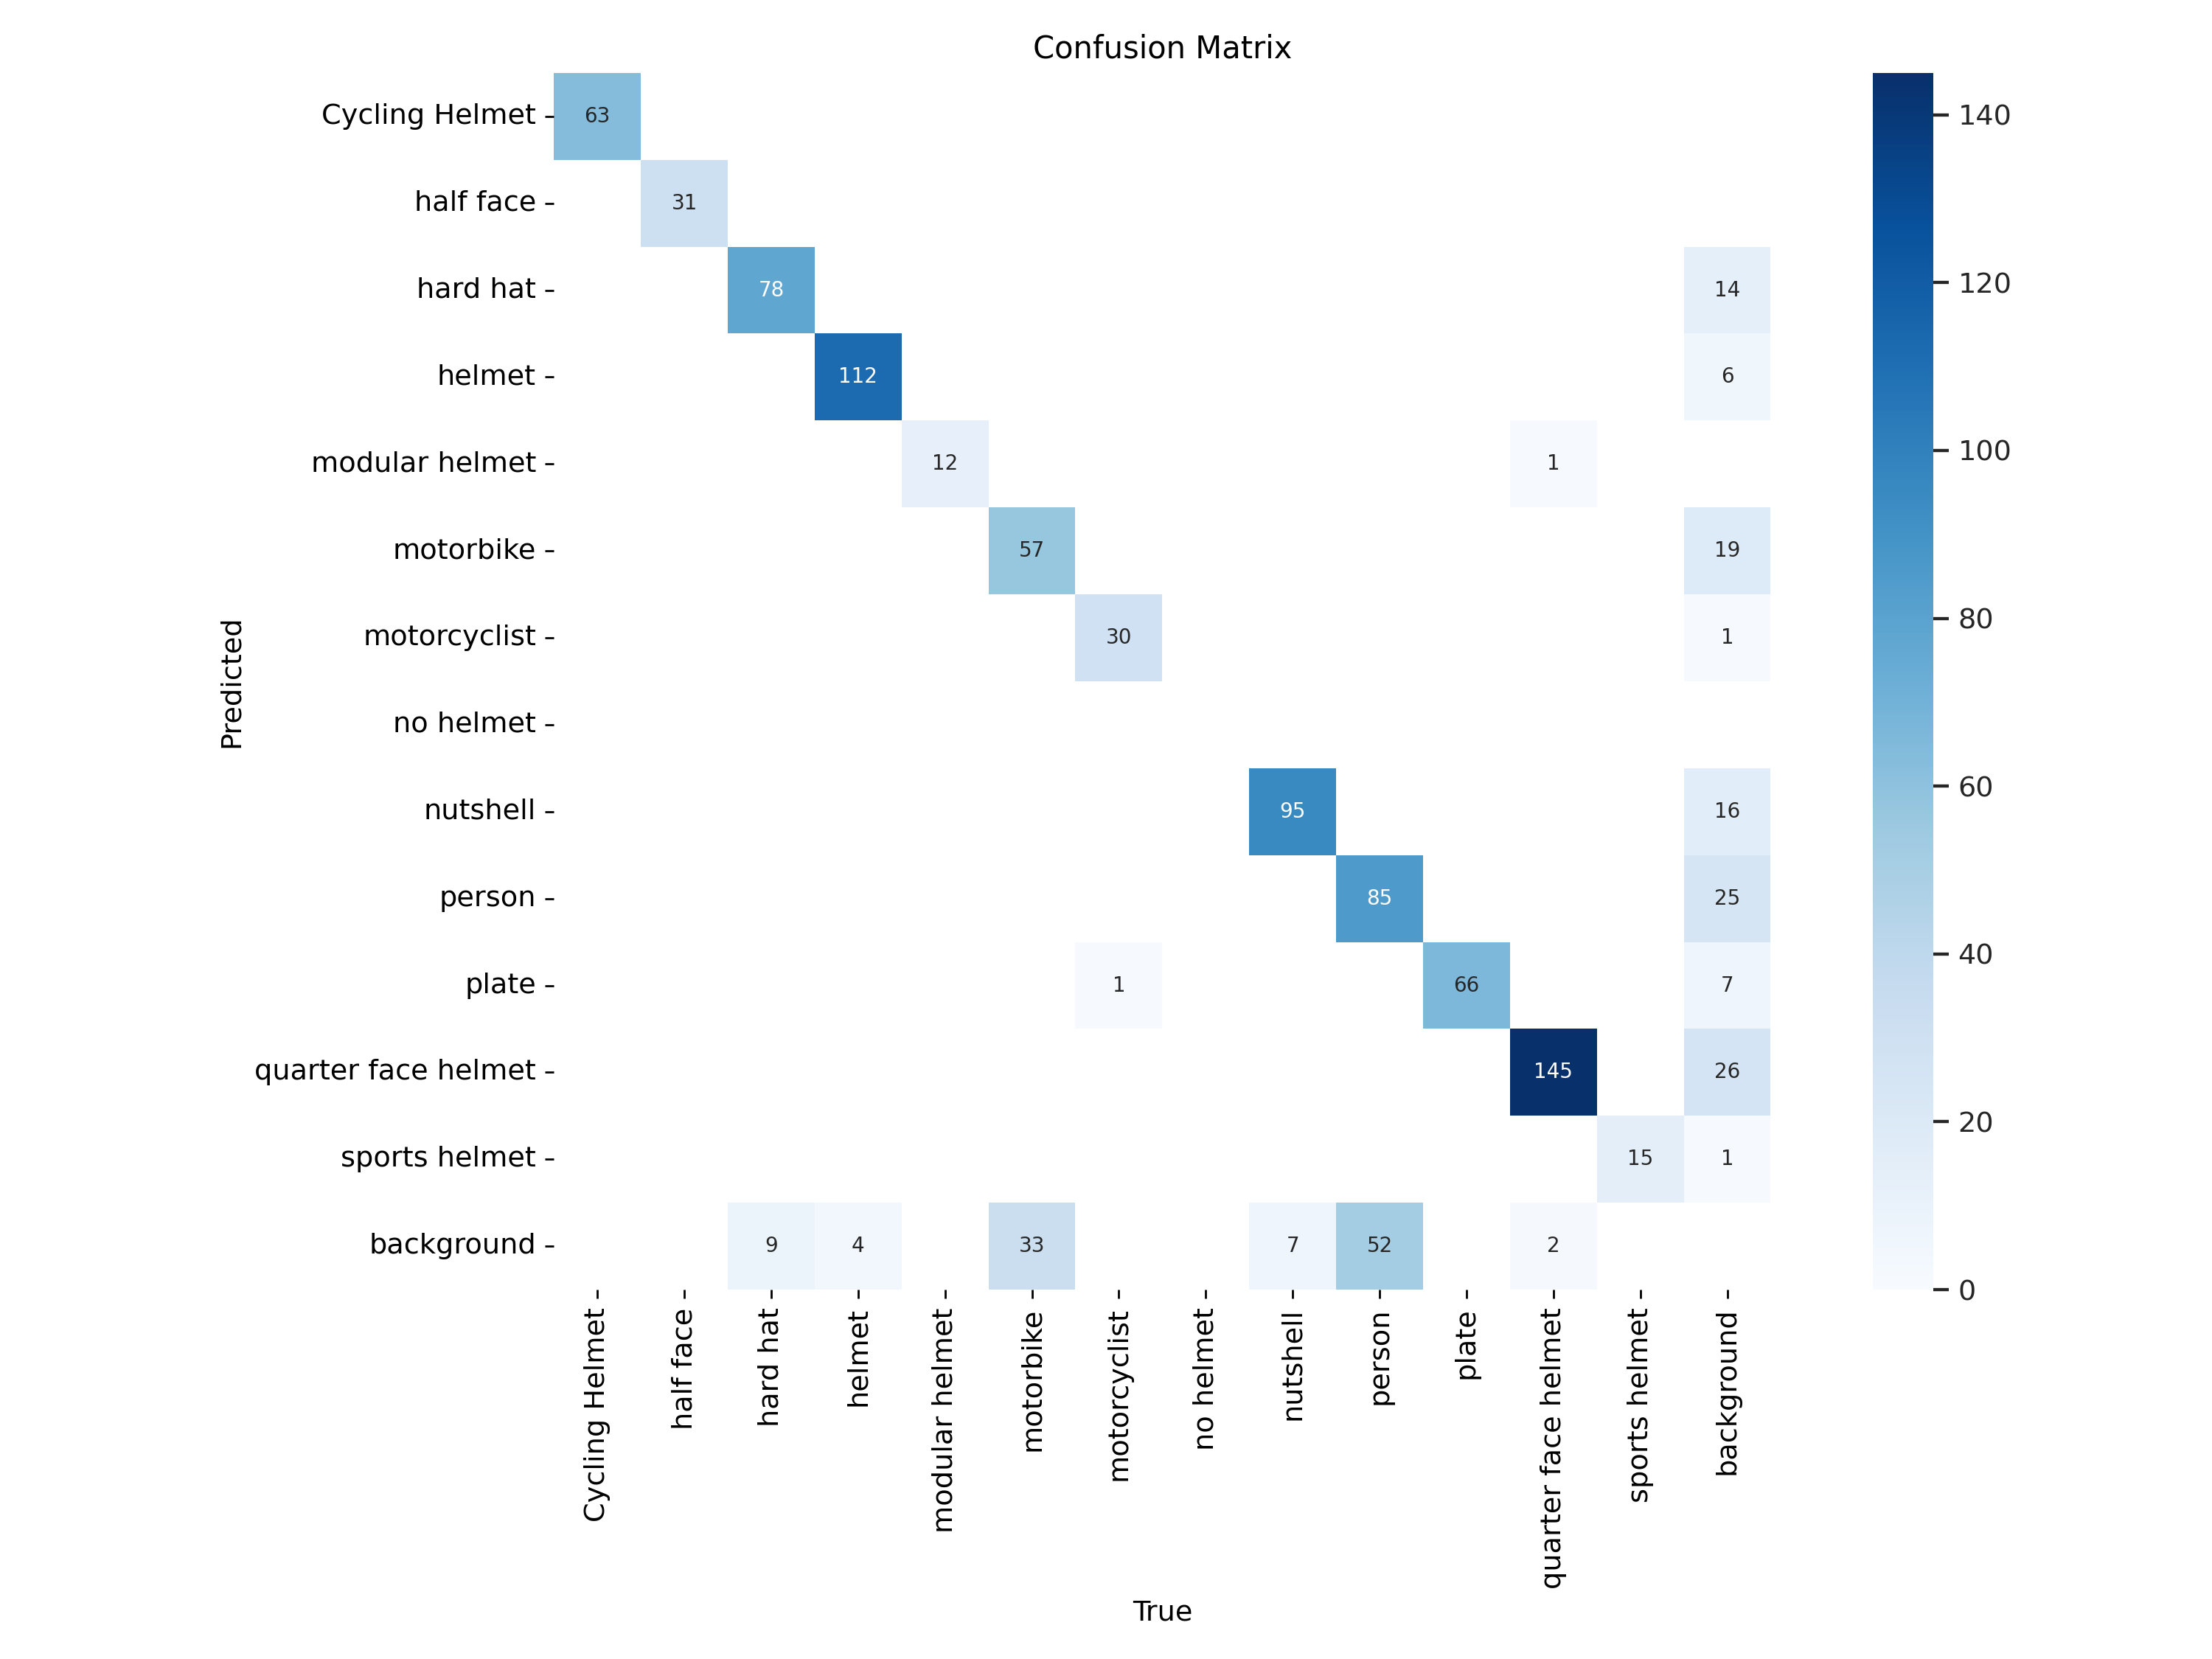

In [23]:
from IPython.display import Image
Image("/content/runs/detect/train/confusion_matrix.png", width=1000)


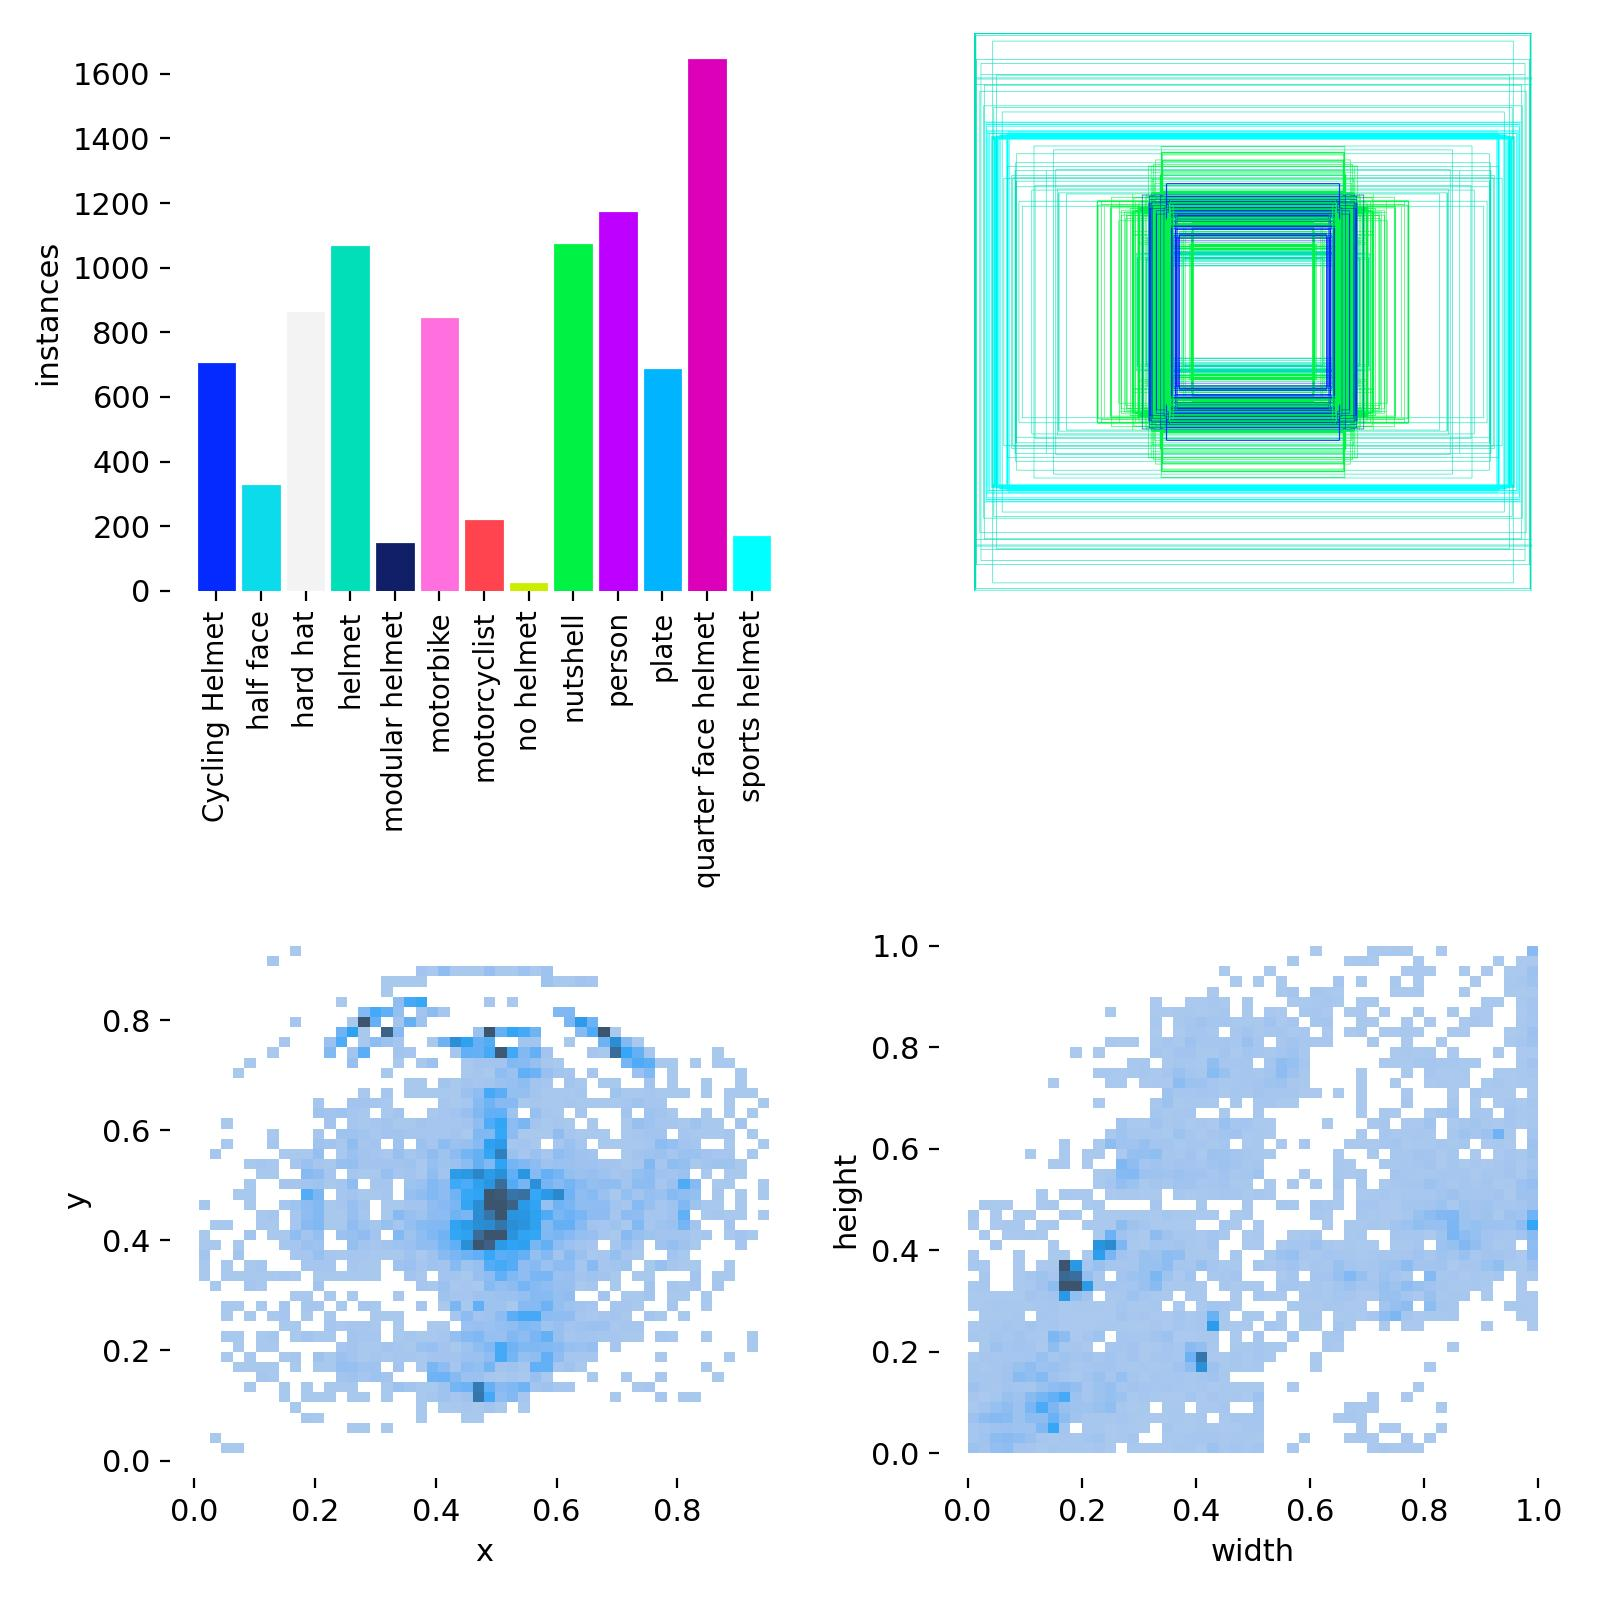

In [16]:
Image("/content/runs/detect/train/labels.jpg", width=1000)


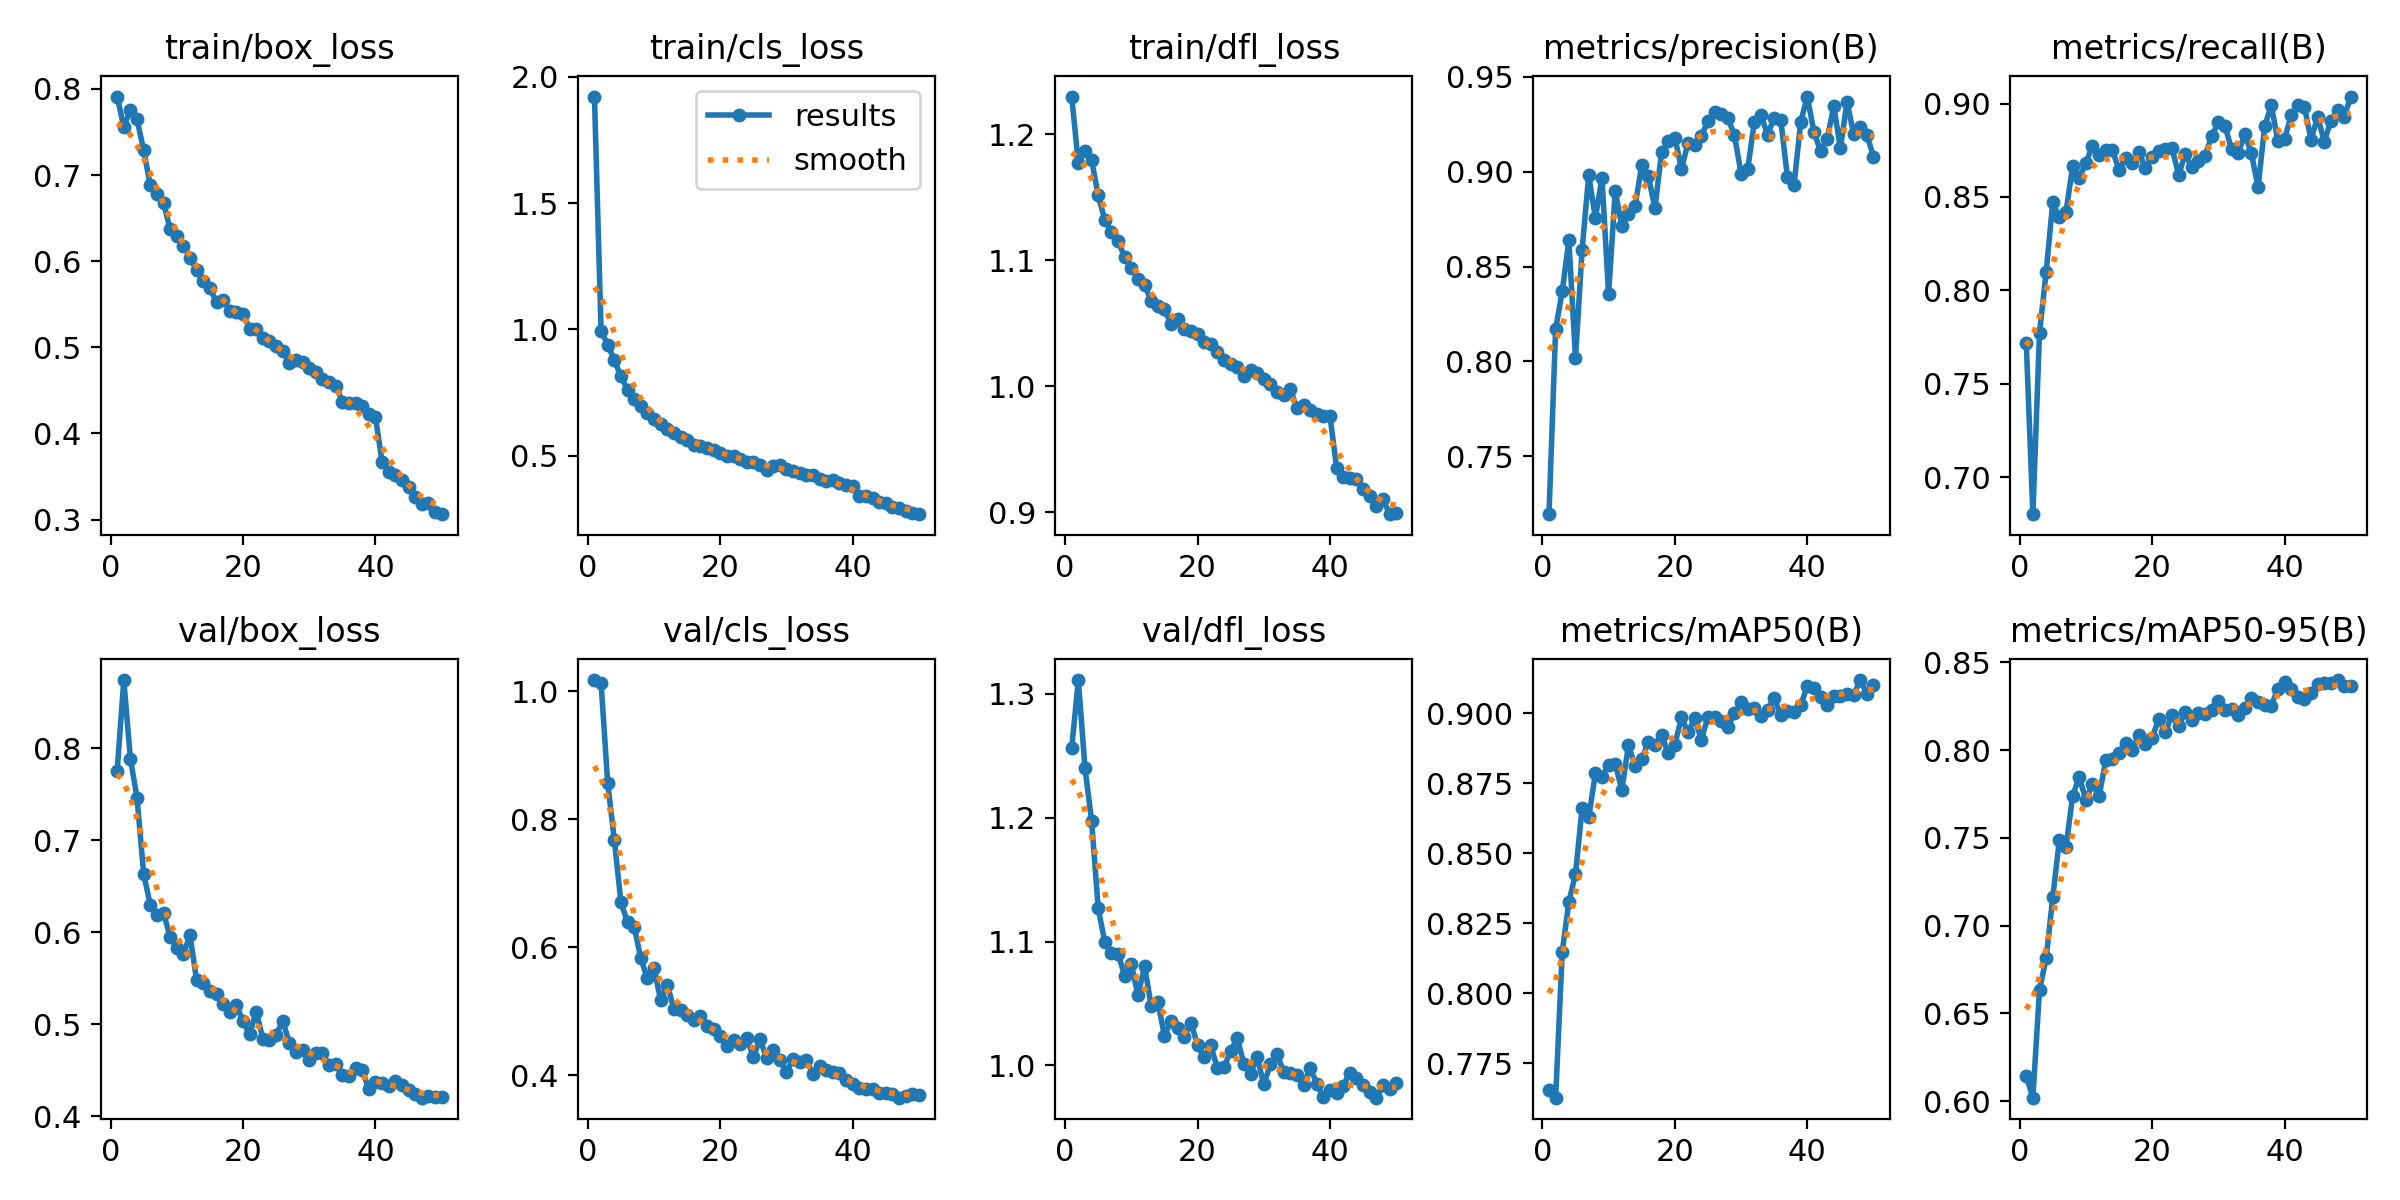

In [18]:
Image("/content/runs/detect/train/results.png", width=1000)


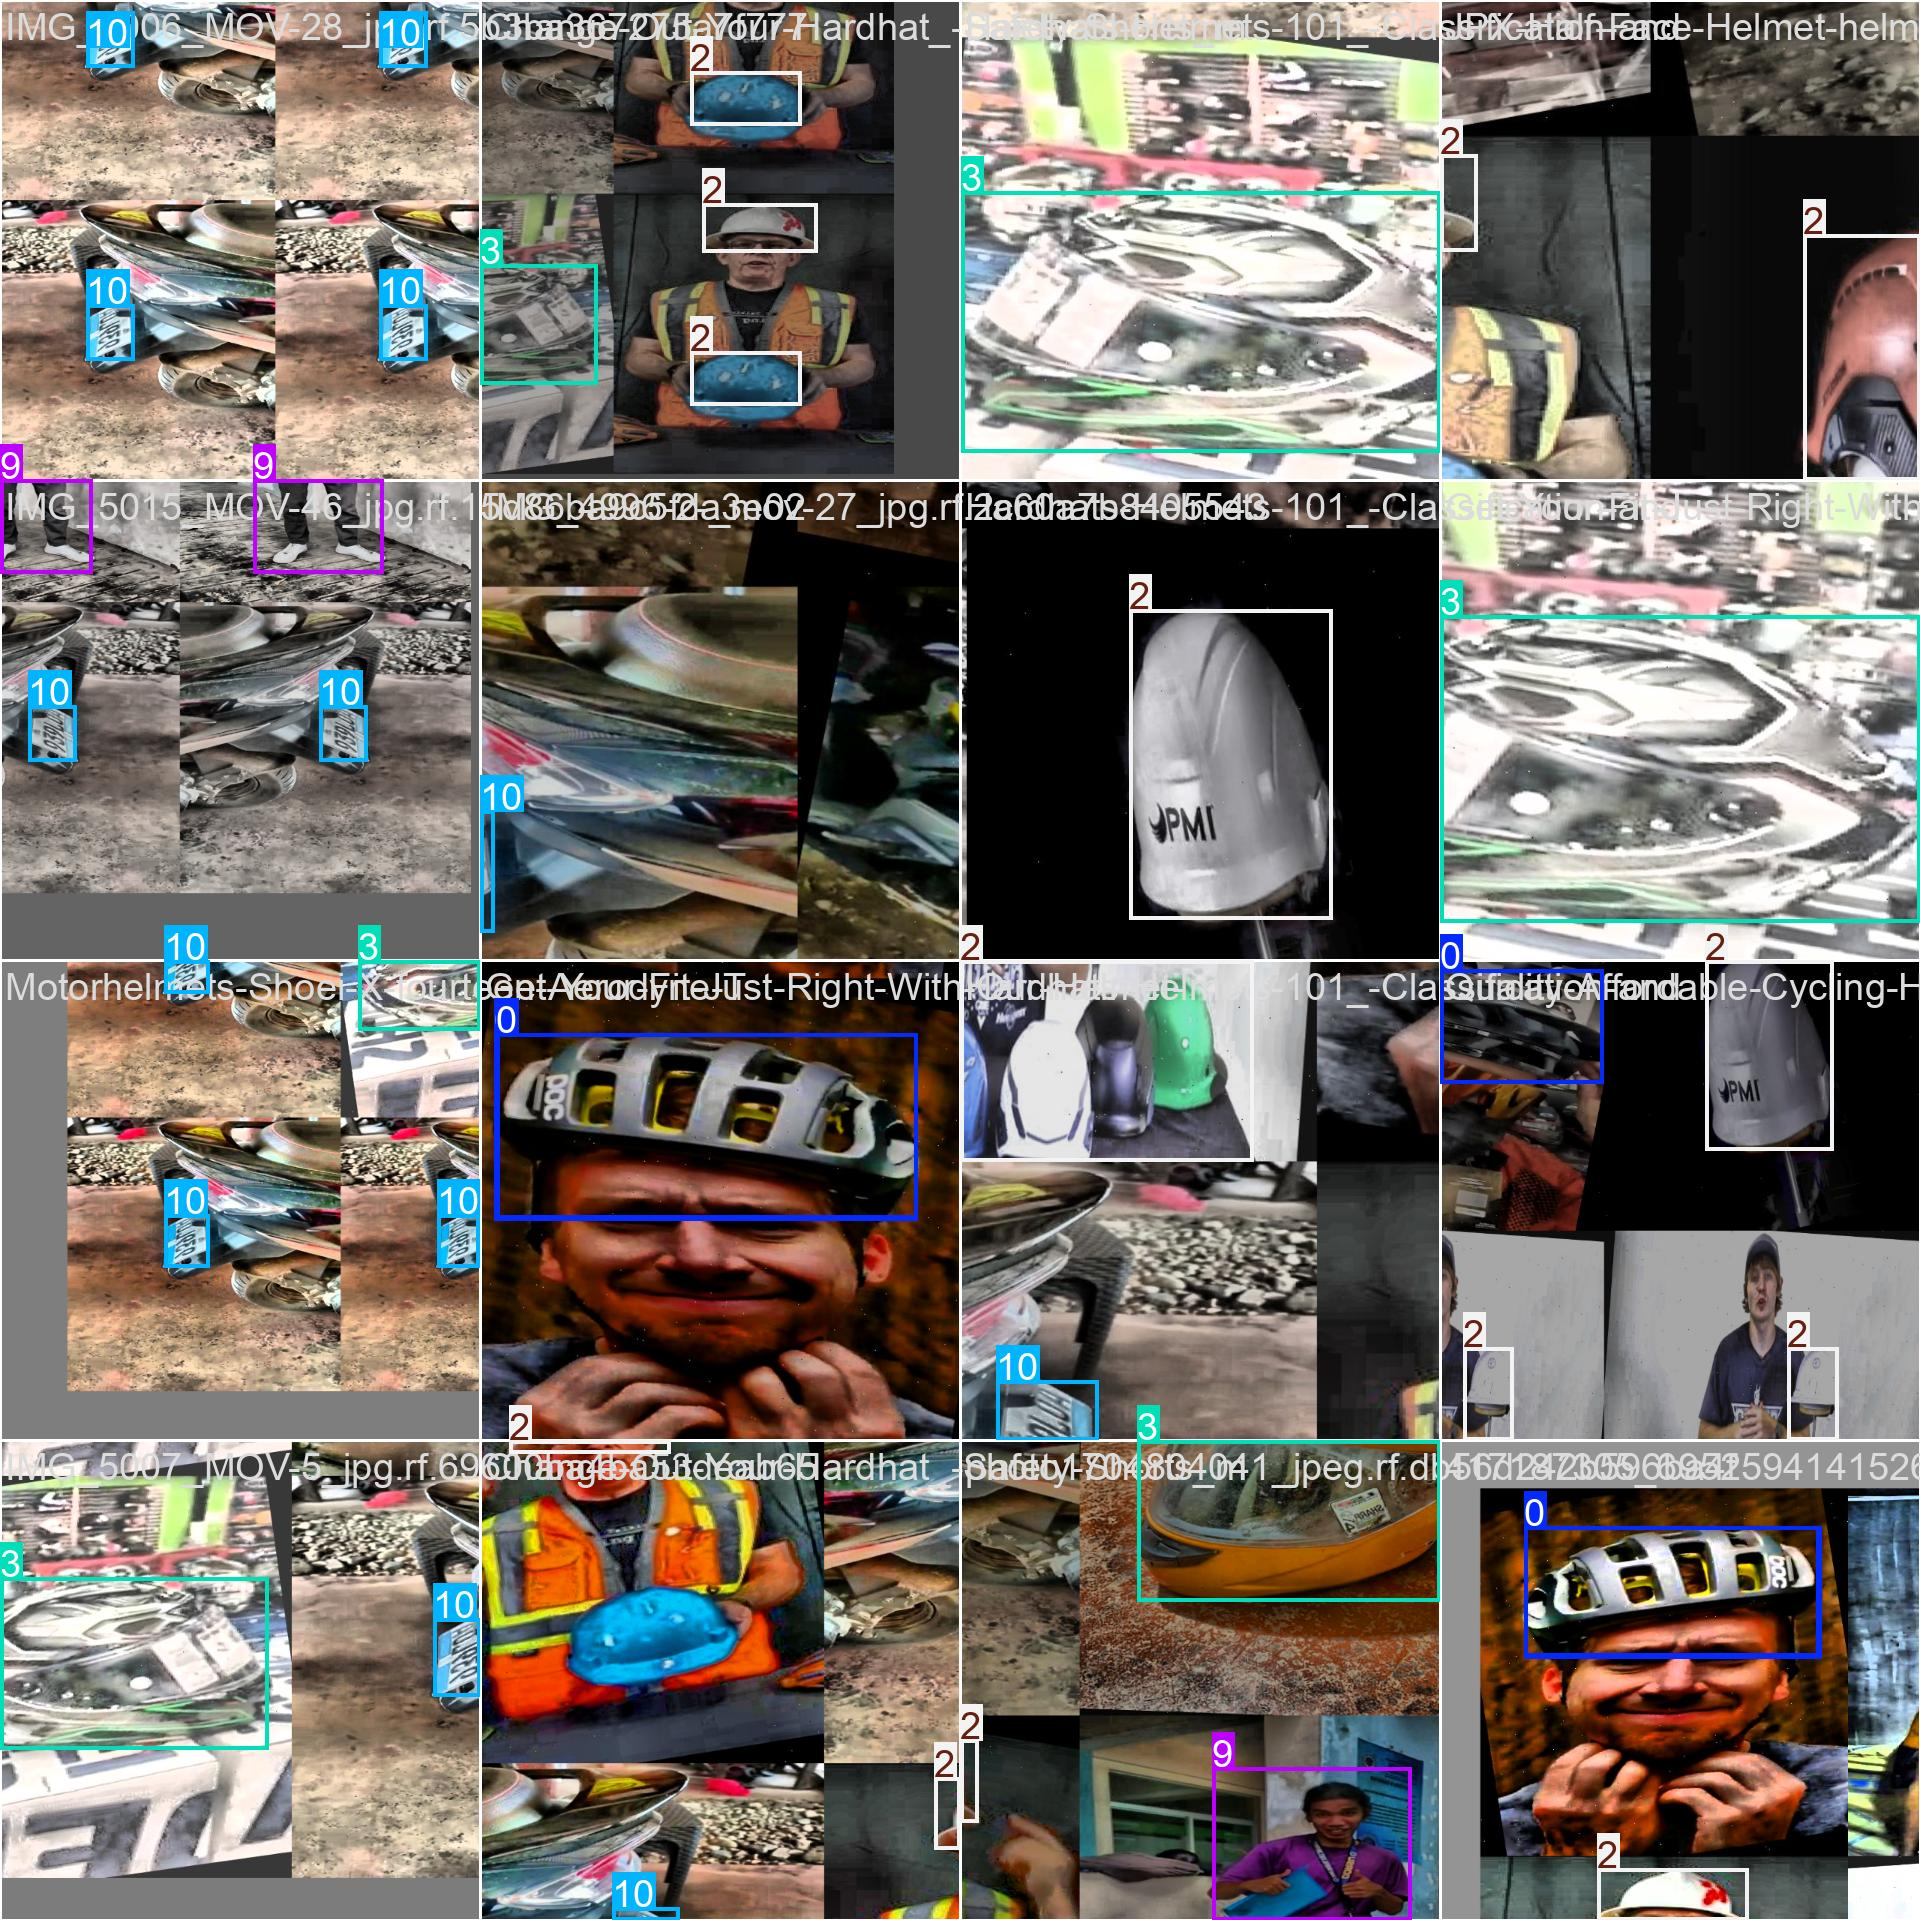

In [19]:
Image("/content/runs/detect/train/train_batch0.jpg", width=1000)


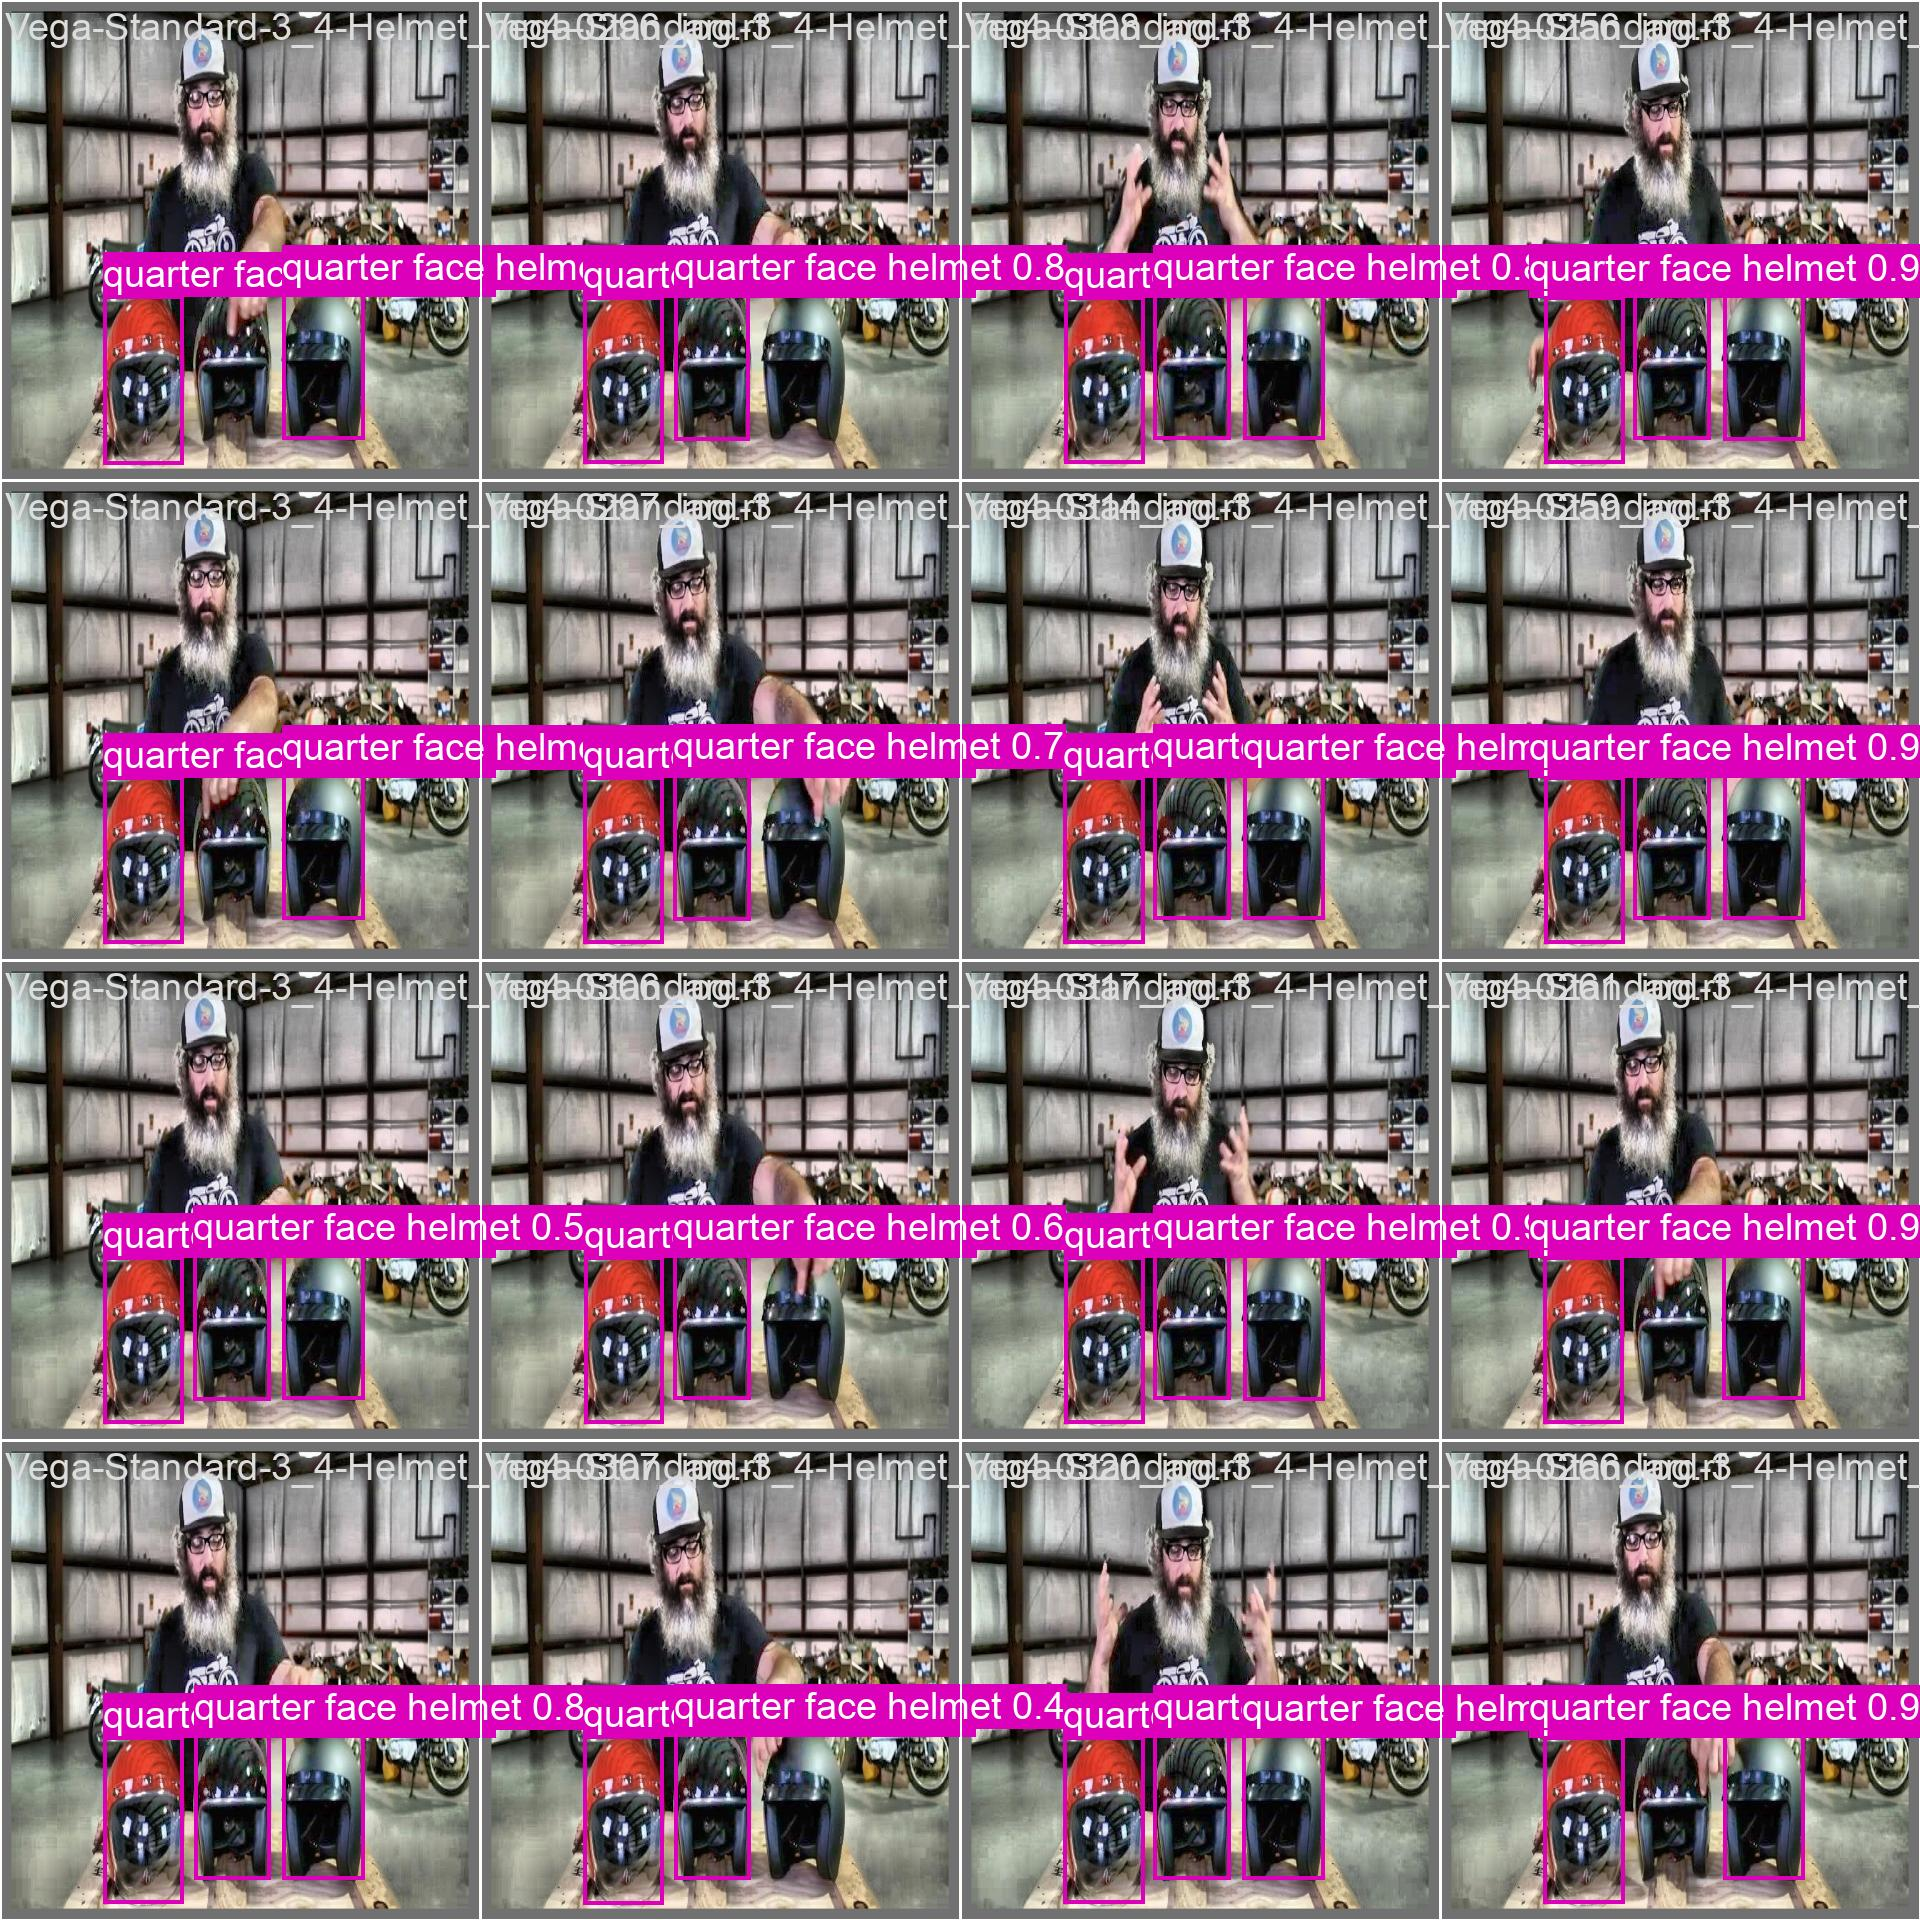

In [24]:
Image("/content/runs/detect/train/val_batch0_pred.jpg", width=1000)

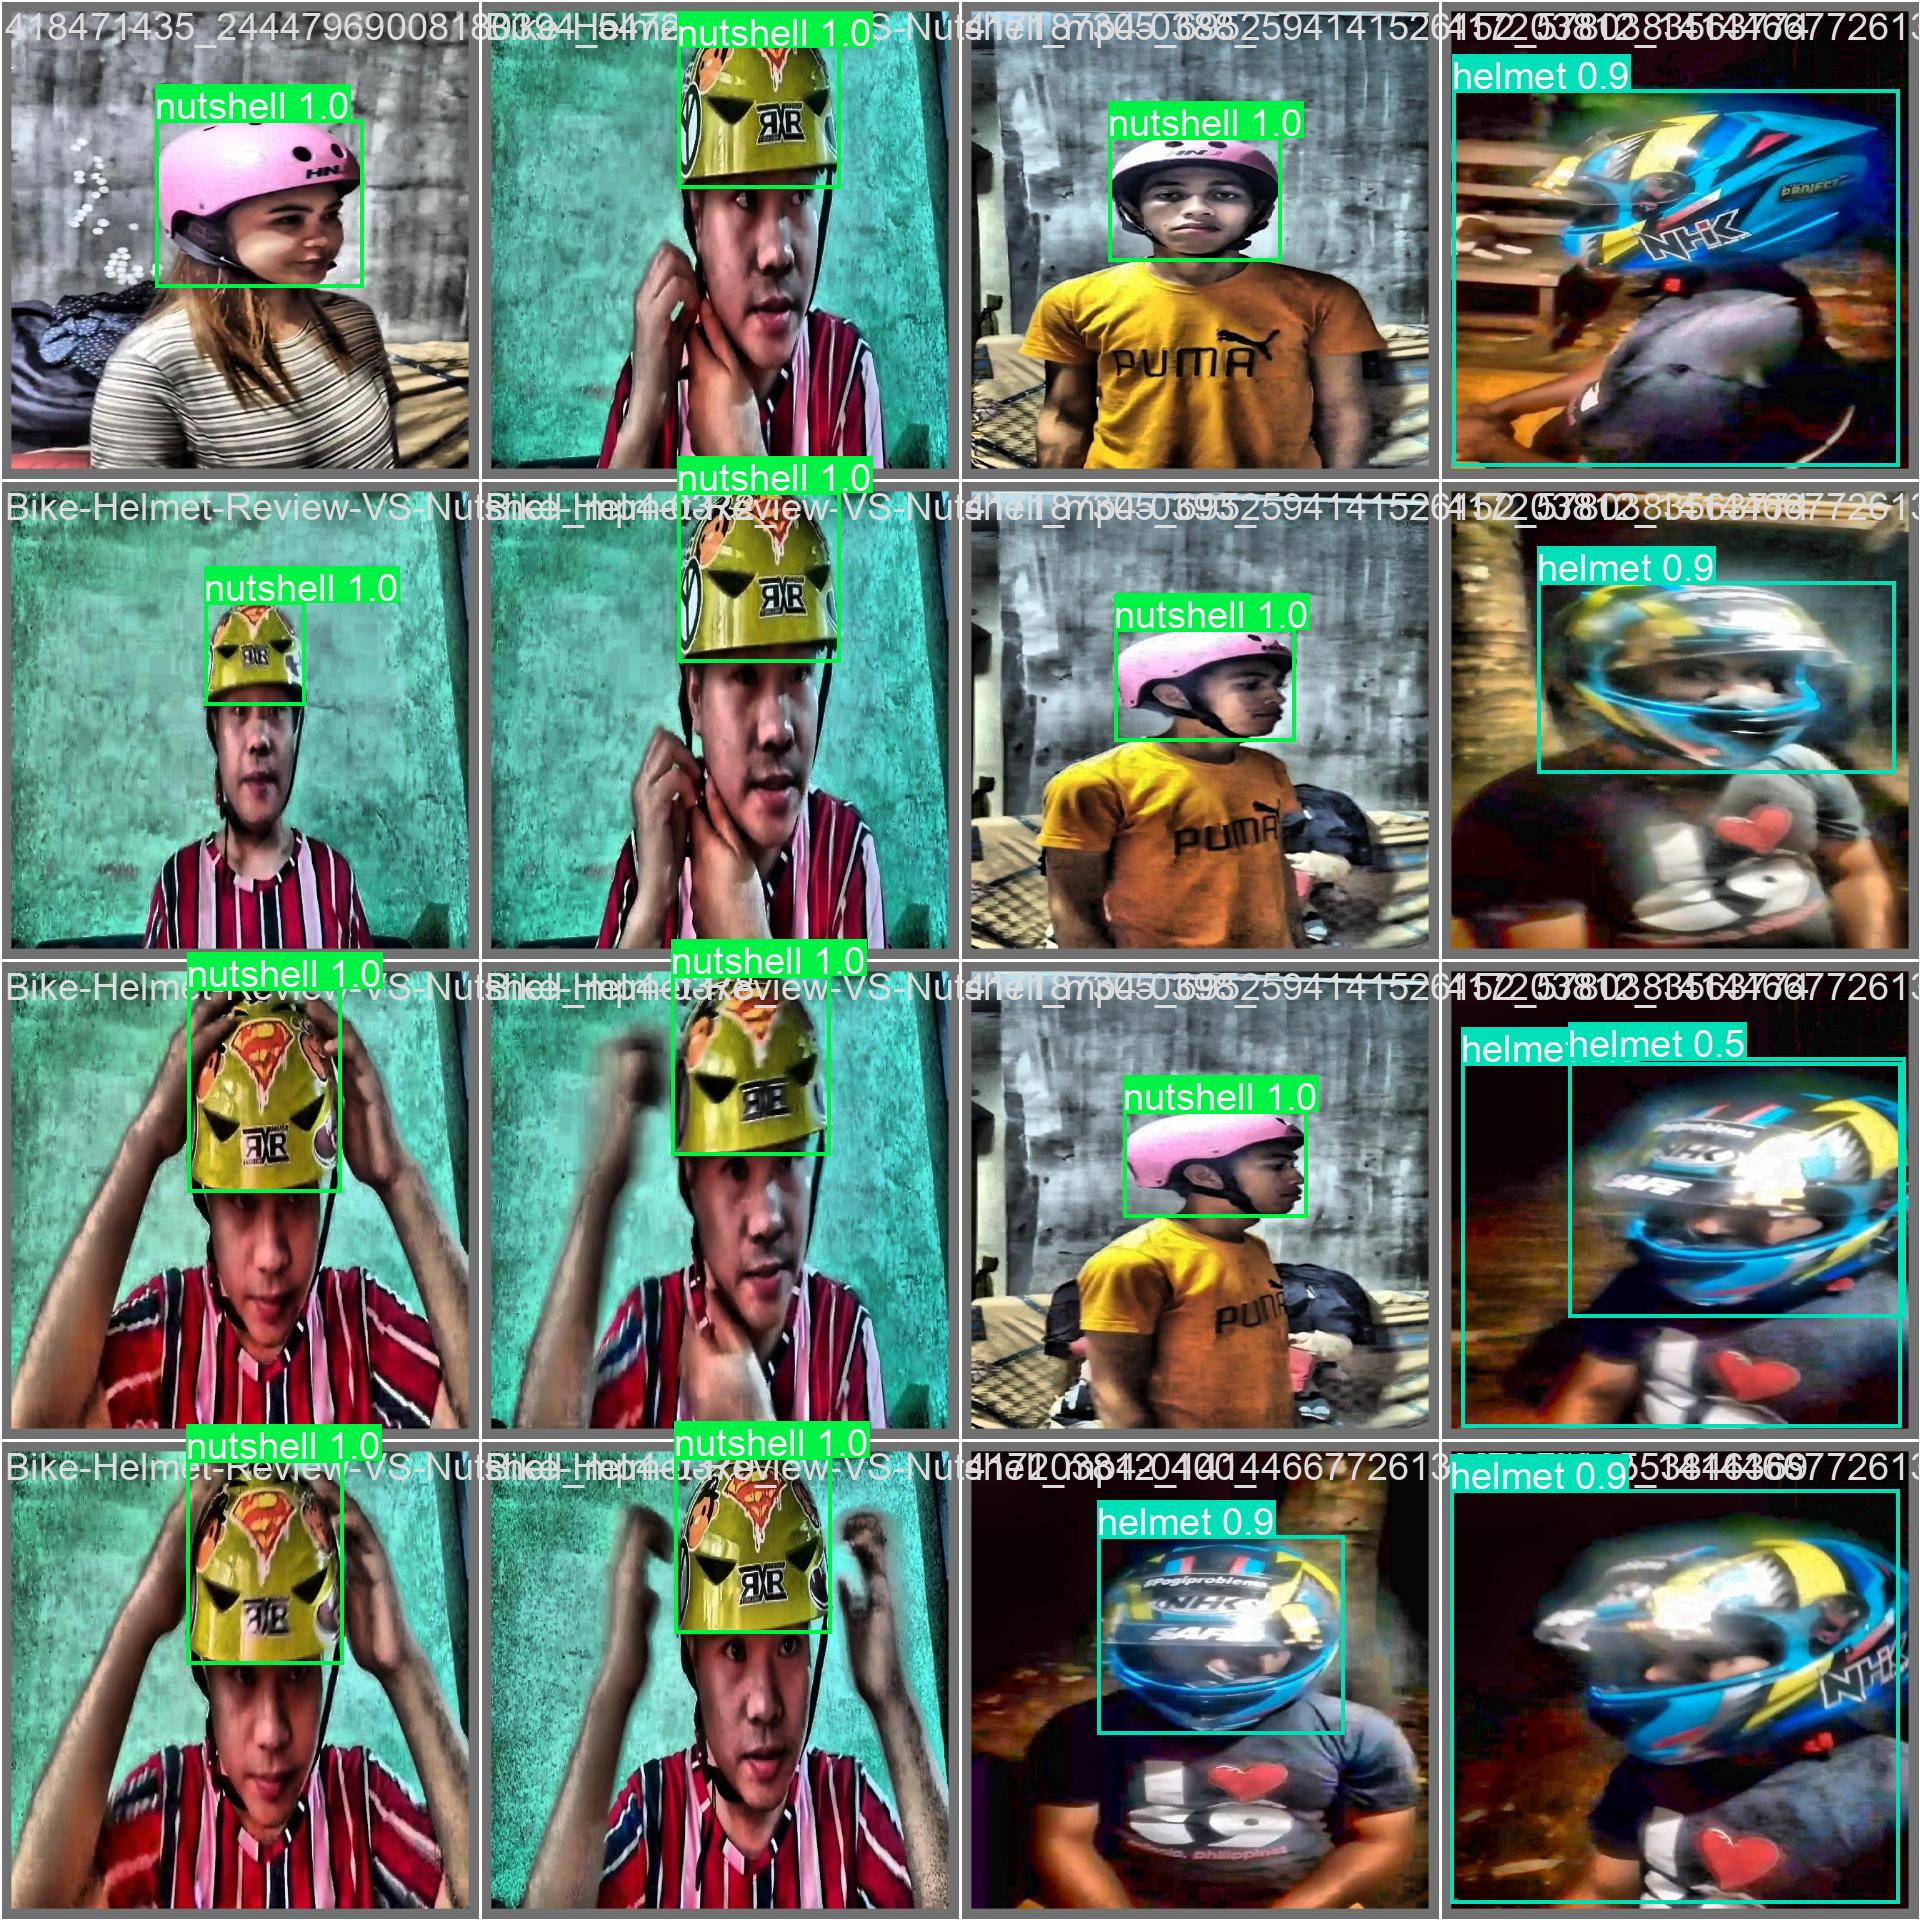

In [26]:
Image("/content/runs/detect/train/val_batch1_pred.jpg", width=1000)


In [27]:
!yolo task=detect mode=predict model="/content/runs/detect/train/weights/best.pt" conf=0.3 source={dataset.location}/test/images save=True


Ultralytics 8.3.130 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,130,615 parameters, 0 gradients, 28.5 GFLOPs

image 1/388 /content/Helmet-Detector-4/test/images/100-Trajecta-MTB-full-face-helmet-_mp4-0179_jpg.rf.bf848a898612e8ad8c8e9e109fc1f908.jpg: 640x640 1 sports helmet, 16.6ms
image 2/388 /content/Helmet-Detector-4/test/images/100-Trajecta-MTB-full-face-helmet-_mp4-0199_jpg.rf.6fc9af6125bdea4486325dc4fff8c315.jpg: 640x640 1 sports helmet, 16.3ms
image 3/388 /content/Helmet-Detector-4/test/images/100-Trajecta-MTB-full-face-helmet-_mp4-0202_jpg.rf.3a8d4caf2715fac8d79efbe05d28f322.jpg: 640x640 1 sports helmet, 16.2ms
image 4/388 /content/Helmet-Detector-4/test/images/416536556_7209359705787581_7005850060369918163_n_mp4-29_jpg.rf.c4121174733d24d59565fc7b89c683b0.jpg: 640x640 1 helmet, 16.3ms
image 5/388 /content/Helmet-Detector-4/test/images/416536556_7209359705787581_7005850060369918163_n_mp4-3_jpg.rf.3d42e8887b9f87cfc7c6fc48d87f

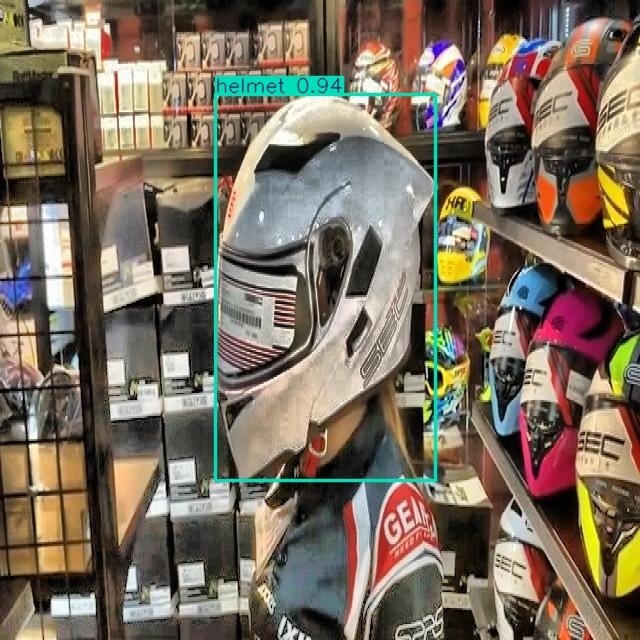

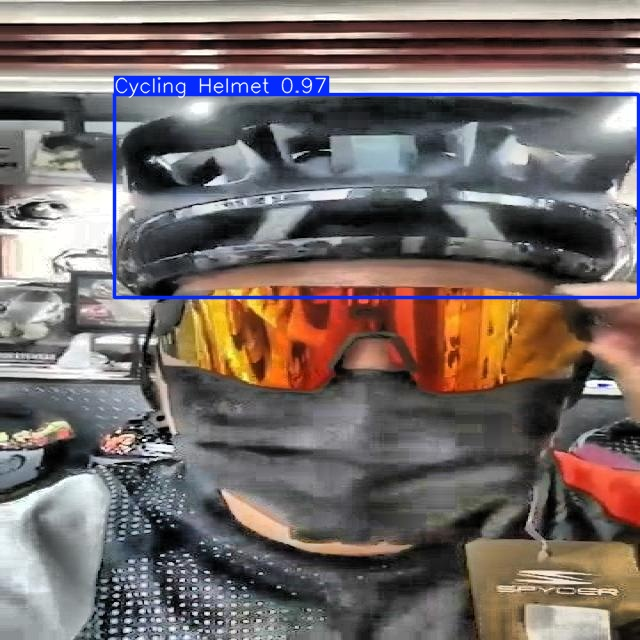

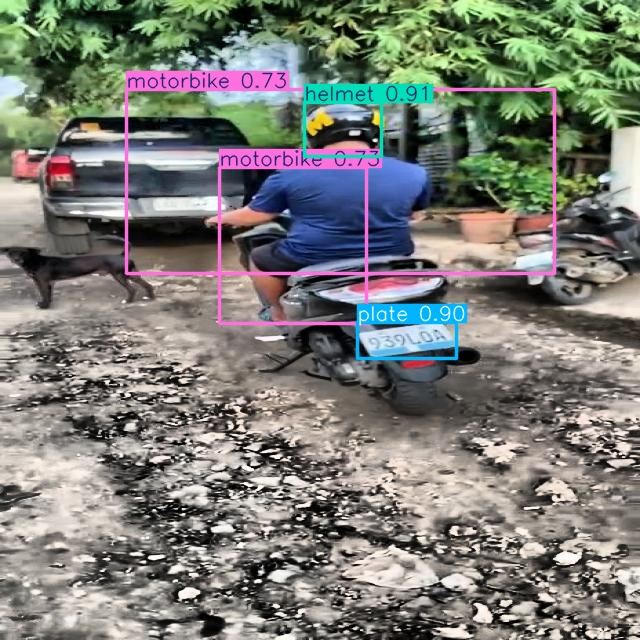

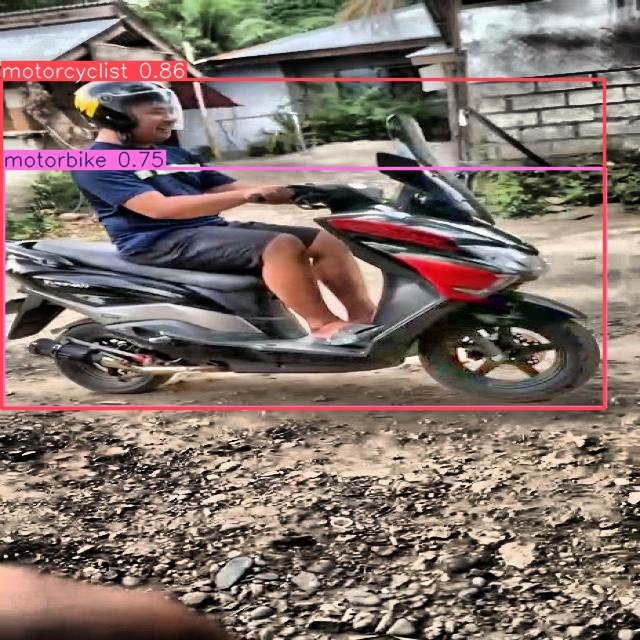

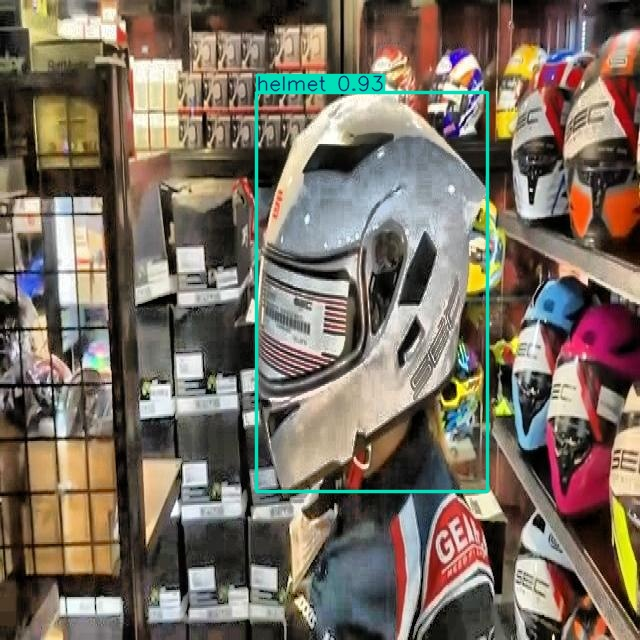

In [31]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[0:5]:
    display(IPyImage(filename=img, width=600))
    print("\n")

In [35]:
!yolo task=detect mode=predict model="/content/runs/detect/train/weights/best.pt" conf=0.1 source="/content/helmet-im.jpg" save=True


Ultralytics 8.3.130 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,130,615 parameters, 0 gradients, 28.5 GFLOPs

image 1/1 /content/helmet-im.jpg: 448x640 1 nutshell, 68.2ms
Speed: 4.0ms preprocess, 68.2ms inference, 186.9ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


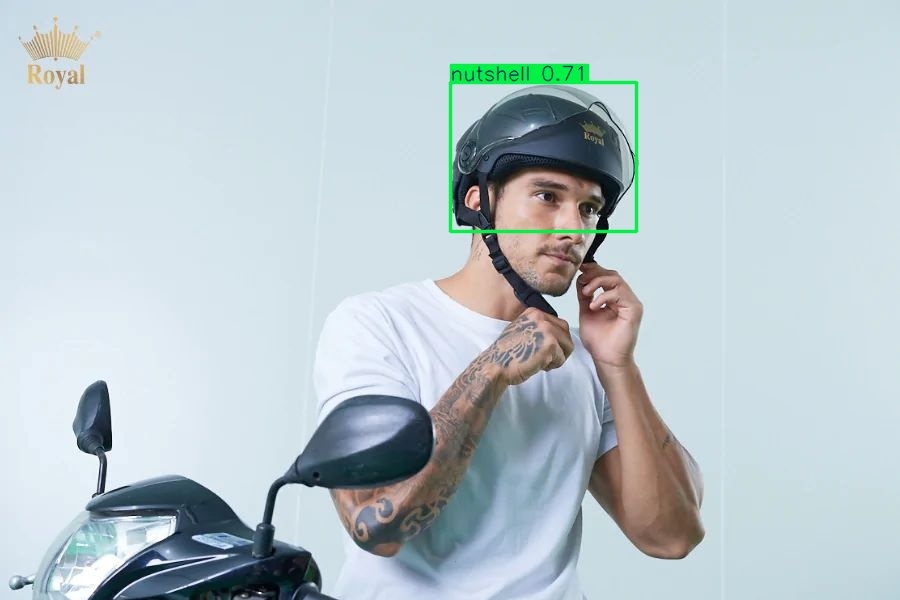

In [36]:
Image("/content/runs/detect/predict2/helmet-im.jpg", width=600)


Step # 08 Inference with Custom Model on Videos

In [40]:
!yolo task=detect mode=predict model= "/content/runs/detect/train/weights/best.pt" conf=0.25 source="2.mp4" save=True


Ultralytics 8.3.130 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,130,615 parameters, 0 gradients, 28.5 GFLOPs

video 1/1 (frame 1/294) /content/2.mp4: 384x640 (no detections), 40.6ms
video 1/1 (frame 2/294) /content/2.mp4: 384x640 (no detections), 10.7ms
video 1/1 (frame 3/294) /content/2.mp4: 384x640 (no detections), 10.7ms
video 1/1 (frame 4/294) /content/2.mp4: 384x640 (no detections), 10.7ms
video 1/1 (frame 5/294) /content/2.mp4: 384x640 (no detections), 10.7ms
video 1/1 (frame 6/294) /content/2.mp4: 384x640 (no detections), 10.7ms
video 1/1 (frame 7/294) /content/2.mp4: 384x640 (no detections), 10.7ms
video 1/1 (frame 8/294) /content/2.mp4: 384x640 (no detections), 10.7ms
video 1/1 (frame 9/294) /content/2.mp4: 384x640 (no detections), 10.7ms
video 1/1 (frame 10/294) /content/2.mp4: 384x640 (no detections), 10.7ms
video 1/1 (frame 11/294) /content/2.mp4: 384x640 (no detections), 10.0ms
video 1/1 (frame 12/294) /content/2.mp4:

In [43]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/runs/detect/predict3/2.avi'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

# Convert video format using ffmpeg
os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Read and encode video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

# Display video
HTML(f"""
<video width=640 controls>
  <source src="{data_url}" type="video/mp4">
</video>
""")
